<a href="https://colab.research.google.com/github/narayansharma275/RandomML/blob/main/HunchRecoSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/ML/hunch_data.xlsx")

In [4]:
len(data)

251181

In [6]:
polls_df = pd.read_excel("/content/drive/MyDrive/ML/hunch_data.xlsx", sheet_name=1)
polls_df.head()

,poll_code,displayType,categories
0,poll_3,text,Movies and TV
1,poll_4,text,Other
2,poll_7,text,Food and Drinks
3,poll_11,text,Dating and Relationship
4,poll_12,text,Would You Rather


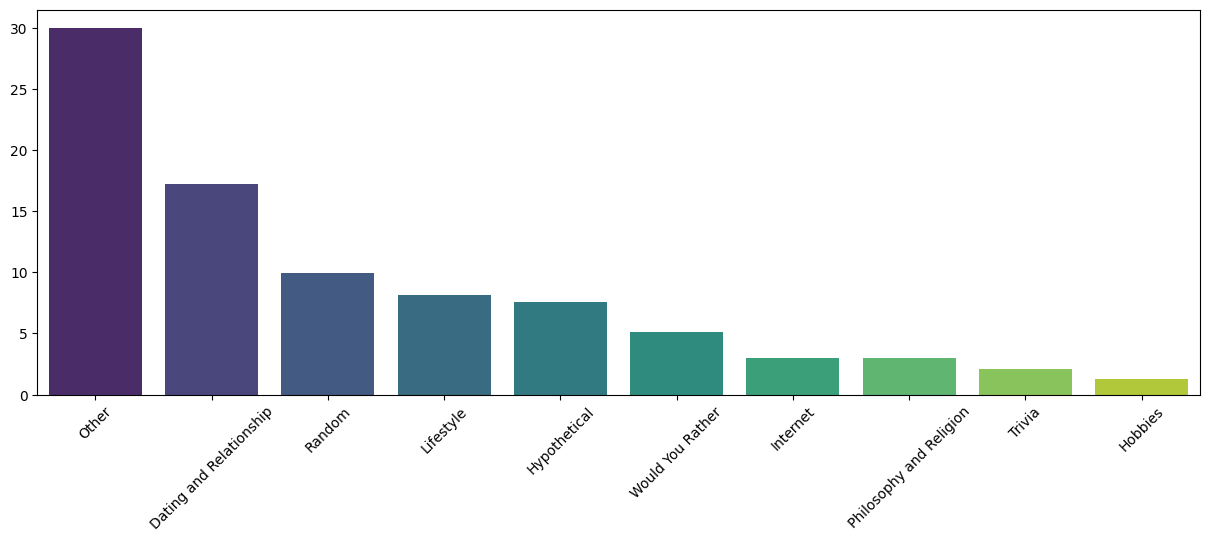

In [7]:
plt.figure(figsize=(15,5))
top_categories = polls_df.categories.value_counts(normalize=True).head(10)*100
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.xticks(rotation=45)
plt.show()

Almost 50% of the Poll Categories are "Other, Dating or Random"

In [8]:
  polls_df.displayType.unique()

array(['text'], dtype=object)

In [ ]:
data.head()

,createdAt,user_code,poll_code,id_code,event,country,city_code,gender,age,college_code
0,2022-12-29 18:30:10 UTC,user_2847,poll_27,option_17106,Impression,country_1,city_1,skipped_by_user,NaN,NaN
1,2022-12-29 18:30:28 UTC,user_2847,poll_220,option_17107,Impression,country_1,city_1,skipped_by_user,NaN,NaN
2,2022-12-29 18:30:38 UTC,user_2847,poll_190,option_17108,Impression,country_1,city_1,skipped_by_user,NaN,NaN
3,2022-12-29 18:30:50 UTC,user_2847,poll_153,option_17109,Impression,country_1,city_1,skipped_by_user,NaN,NaN
4,2022-12-29 18:31:34 UTC,user_2847,poll_42,option_17110,Impression,country_1,city_1,skipped_by_user,NaN,NaN


In [ ]:
data.event.unique(),data.gender.unique()

(array(['Impression', 'Session', 'Expand', 'Shares', 'Polls Answered'],
       dtype=object),
 array(['skipped_by_user', 'male', 'female', 'non_binary',
        'prefer_not_to_say', 'non-binary'], dtype=object))

In [ ]:
data.user_code.nunique(),data.poll_code.nunique(), data.city_code.nunique()

(4499, 893, 134)

### **4499 Unique Users, 893 Polls**

In [9]:
data= data.merge(polls_df[['poll_code','categories']],how='left',on='poll_code')

In [10]:
data.sample(5)

,createdAt,user_code,poll_code,id_code,event,country,city_code,gender,age,college_code,categories
224314,2023-01-06 15:34:12 UTC,user_410,poll_196,option_183241,Polls Answered,country_1,city_1,male,22.0,NaN,Would You Rather
61562,2023-01-19 06:46:09 UTC,user_898,poll_670,option_87678,Impression,country_1,city_1,male,22.0,Other,Trivia
97238,2023-01-25 09:14:20 UTC,user_3667,poll_109,option_125067,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Dating and Relationship
222768,2023-01-16 14:34:27 UTC,user_4098,poll_95,option_182927,Polls Answered,country_1,city_1,skipped_by_user,NaN,NaN,Dating and Relationship
178341,2023-01-25 17:49:16 UTC,user_3092,poll_563,option_184351,Polls Answered,country_1,city_1,female,22.0,Other,Food and Drinks


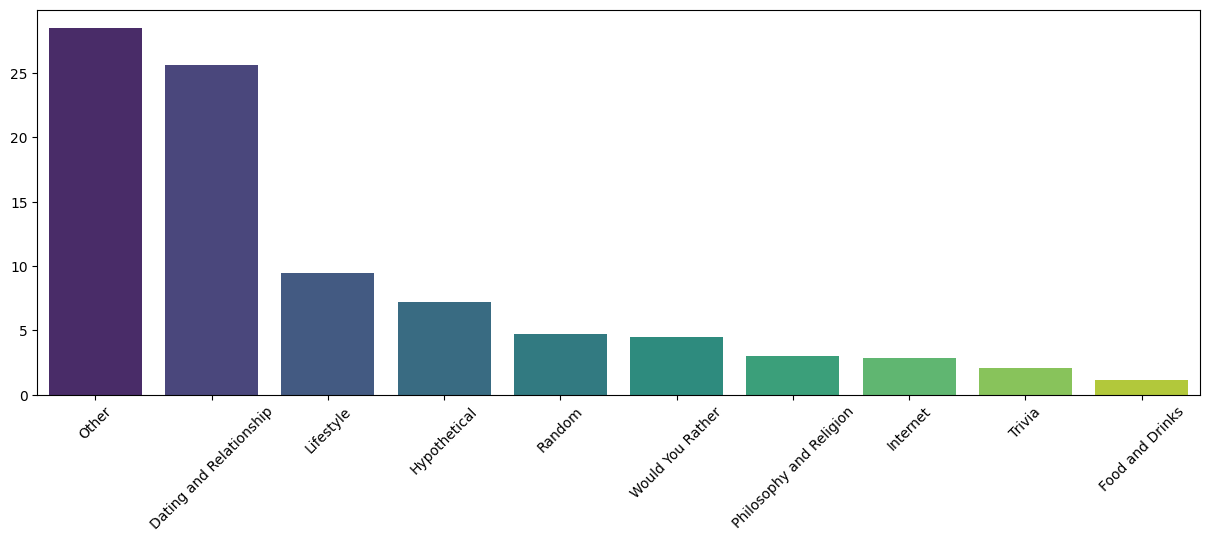

In [ ]:
plt.figure(figsize=(15,5))
top_categories = data.categories.value_counts(normalize=True).head(10)*100
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.xticks(rotation=45)
plt.show()

Dating, Lifestyle and Hypothetical & WYR Seems to contributing to ~40% Interactions

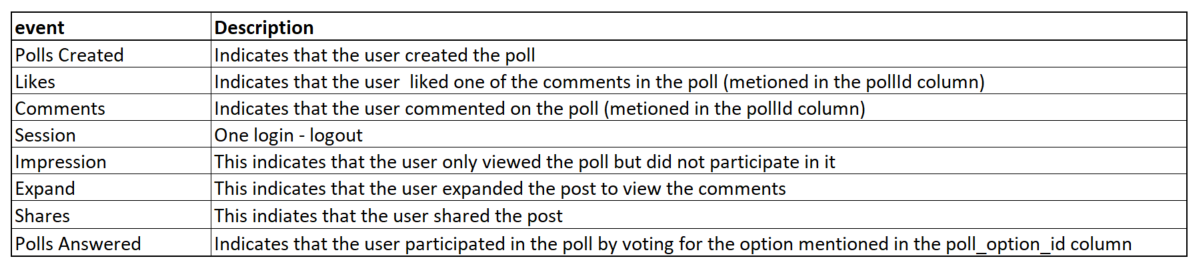

In [ ]:
data.groupby('event').createdAt.count()

event
Expand              5967
Impression        144841
Polls Answered    108700
Session             3421
Shares               462
Name: createdAt, dtype: int64


### *   'Polls Answered' is a Strong Positive, 'Shares' is 2nd, 'Expand' comes 3rd.
### *   Impression is a weak identifier
### *   Session cannot be directly used as a preference builder




In [11]:
print(type(data.createdAt.values[0]))

data['createdAt'] = pd.to_datetime(data['createdAt'])

print(data.createdAt.values[0])


<class 'str'>
2022-12-29T18:30:10.000000000


In [12]:
data['date'] = data['createdAt'].dt.strftime('%d-%m-%Y')
data.head()

,createdAt,user_code,poll_code,id_code,event,country,city_code,gender,age,college_code,categories,date
0,2022-12-29 18:30:10+00:00,user_2847,poll_27,option_17106,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Philosophy and Religion,29-12-2022
1,2022-12-29 18:30:28+00:00,user_2847,poll_220,option_17107,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Would You Rather,29-12-2022
2,2022-12-29 18:30:38+00:00,user_2847,poll_190,option_17108,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Hypothetical,29-12-2022
3,2022-12-29 18:30:50+00:00,user_2847,poll_153,option_17109,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Dating and Relationship,29-12-2022
4,2022-12-29 18:31:34+00:00,user_2847,poll_42,option_17110,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Dating and Relationship,29-12-2022


In [ ]:
data.date.nunique()

47

In [ ]:


sorted(pd.to_datetime(data.date.unique(), format='%d-%m-%Y'))

[Timestamp('2022-12-13 00:00:00'),
 Timestamp('2022-12-14 00:00:00'),
 Timestamp('2022-12-15 00:00:00'),
 Timestamp('2022-12-17 00:00:00'),
 Timestamp('2022-12-19 00:00:00'),
 Timestamp('2022-12-20 00:00:00'),
 Timestamp('2022-12-21 00:00:00'),
 Timestamp('2022-12-22 00:00:00'),
 Timestamp('2022-12-23 00:00:00'),
 Timestamp('2022-12-24 00:00:00'),
 Timestamp('2022-12-25 00:00:00'),
 Timestamp('2022-12-26 00:00:00'),
 Timestamp('2022-12-27 00:00:00'),
 Timestamp('2022-12-28 00:00:00'),
 Timestamp('2022-12-29 00:00:00'),
 Timestamp('2022-12-30 00:00:00'),
 Timestamp('2022-12-31 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-01-02 00:00:00'),
 Timestamp('2023-01-03 00:00:00'),
 Timestamp('2023-01-04 00:00:00'),
 Timestamp('2023-01-05 00:00:00'),
 Timestamp('2023-01-06 00:00:00'),
 Timestamp('2023-01-07 00:00:00'),
 Timestamp('2023-01-08 00:00:00'),
 Timestamp('2023-01-09 00:00:00'),
 Timestamp('2023-01-10 00:00:00'),
 Timestamp('2023-01-11 00:00:00'),
 Timestamp('2023-01-

### **What's given?**

2.6L Odd Interactions spread over 47 Days (13/12/2022 - 31/01/2023)

For every user we have 2 kinds of features

1. Collaborative

  1.   Poll that they saw/interacted with
  2.   Type of interaction with the poll

2. Content

  1. country
  2. city
  3. gender
  4. age
  5. college code

**Goal**:

Based on the above features, for each user, recommend the top 50 polls

Approach 0:

Popularity Based: Sort the polls by interaction-frequency and prepare top 50 polls and suggest the same to every use

Approach 1:

Cluster users based on their profile content and cluster polls on their categories and then use user and poll clusters to be served together.

Approach 2:

Use User - Poll Category data to create co-occurrence matrix (User-Item) and fatorize it using an SVD like decomposition  


In [ ]:
### Missing Value Treatment

<Axes: >

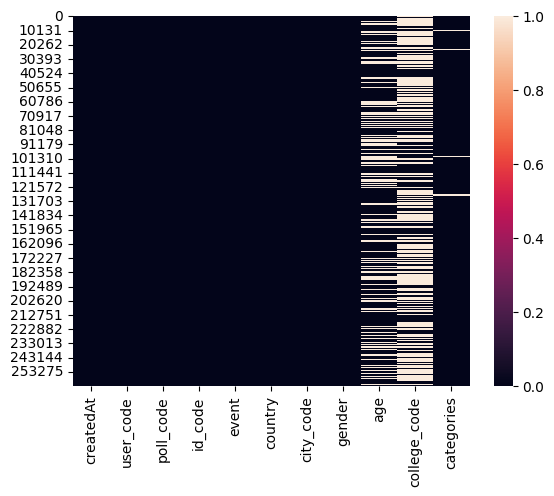

In [ ]:

sns.heatmap(data.isna())

NaN values are only in 3 columns - age, college_code and categories.
1. College code seems to have more than 50% missing values.
2. Age seems to be missing for 35% or so (roughly)
3. Categories have a few missing (apart from the ones where event is "Session" where we cant have a poll_category, there we can try to impute or remove quickly

### Data Cleaning

In [ ]:
(data.isnull().sum() / len(data)) * 100

createdAt        0.000000
user_code        0.000000
poll_code        0.000000
id_code          0.000000
event            0.000000
country          0.000000
city_code        0.000000
gender           0.000000
age             31.335923
college_code    57.104077
categories       1.717599
dtype: float64

In [ ]:
data[data.event=='Session'].poll_code.unique(),data[data.event=='categories'].poll_code.unique()

(array(['unknown_poll'], dtype=object), array([], dtype=object))

In [ ]:
data[data.event=='Session'].user_code.nunique()

1781

In [ ]:
data.user_code.nunique()


4499

In [ ]:
data[data.event!='Session'].isna().sum()

createdAt            0
user_code            0
poll_code            0
id_code              0
event                0
country              0
city_code            0
gender               0
age              80852
college_code    148348
categories        1103
dtype: int64

Looks like when event = Session, we have no details of poll_id which makes sense obviously. Also, not every user_id in the dataset has a session trace
 as unique userids in the the entire data is 4499, where as with event=session, that number is only 1781

In [ ]:
### Removing logs with even = session for now

In [13]:
nonsess_data = data[data.event!='Session']
nonsess_data.sample()

,createdAt,user_code,poll_code,id_code,event,country,city_code,gender,age,college_code,categories,date
94616,2023-01-25 07:07:58+00:00,unknown_user,poll_118,option_122357,Impression,unknown_country,unknown_city,skipped_by_user,NaN,NaN,Other,25-01-2023


In [14]:
len(nonsess_data)  #2.6L

259970

In [15]:
## Dropping all rows with unknown_user because it's hard to impute them; can't approximate the user accurately enough given the state of data available

print(nonsess_data[nonsess_data.user_code=='unknown_user'].user_code.count())
nonsess_data = nonsess_data[nonsess_data.user_code!='unknown_user']


15778


### Dealing with Missing Values in Categories

In [ ]:
nonsess_data.head()

,createdAt,user_code,poll_code,id_code,event,country,city_code,gender,age,college_code,categories,date
0,2022-12-29 18:30:10+00:00,user_2847,poll_27,option_17106,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Philosophy and Religion,29-12-2022
1,2022-12-29 18:30:28+00:00,user_2847,poll_220,option_17107,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Would You Rather,29-12-2022
2,2022-12-29 18:30:38+00:00,user_2847,poll_190,option_17108,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Hypothetical,29-12-2022
3,2022-12-29 18:30:50+00:00,user_2847,poll_153,option_17109,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Dating and Relationship,29-12-2022
4,2022-12-29 18:31:34+00:00,user_2847,poll_42,option_17110,Impression,country_1,city_1,skipped_by_user,NaN,NaN,Dating and Relationship,29-12-2022


In [ ]:
nonsess_data.poll_code.count(), nonsess_data.poll_code.nunique()

(244192, 890)

createdAt            0
user_code            0
poll_code            0
id_code              0
event                0
country              0
city_code            0
gender               0
age              65074
college_code    132570
categories        1080
date                 0
dtype: int64


<Axes: >

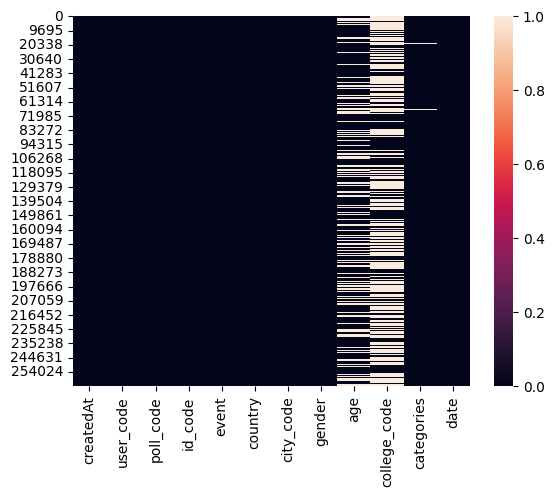

In [ ]:
print(nonsess_data.isna().sum())
sns.heatmap(nonsess_data.isna())

In [ ]:
### Exploring Category as a column (when value is NA) against other features such as users, event,date etc.

In [ ]:
### missing "categories" for - 1080 rows

In [16]:
nonsess_data[nonsess_data.categories.isna()].user_code.value_counts(normalize=True).head(10)*100

user_61     10.185185
user_249     5.370370
user_115     5.277778
user_29      4.166667
user_121     4.074074
user_131     3.796296
user_109     3.796296
user_135     3.703704
user_2       3.425926
user_53      3.055556
Name: user_code, dtype: float64

In [17]:
nonsess_data[nonsess_data.categories.isna()].groupby('event').createdAt.count()

event
Expand          49
Impression    1024
Shares           7
Name: createdAt, dtype: int64

In [20]:
na_category_pollCodes = nonsess_data[nonsess_data.categories.isna()].poll_code.tolist()
len(na_category_pollCodes), len(set(na_category_pollCodes))   ### 185/893 poll_codes dont have a category

(1080, 183)

183 Polls, occuring 1080 times have been missing category values



In [ ]:
### most missing values arise on 2 timeframes: [10,11 Jan 2023], [15,17,21,22] Dec 2022
nonsess_data[nonsess_data.categories.isna()].groupby('date').date.count()

date
10-01-2023    255
11-01-2023    278
14-12-2022      1
15-12-2022     52
17-12-2022    159
21-12-2022    295
22-12-2022     40
Name: date, dtype: int64

In [18]:
tf1 = list(nonsess_data[nonsess_data.categories.isna()].groupby('date').date.count().index.values[:2])
tf2 = list(nonsess_data[nonsess_data.categories.isna()].groupby('date').date.count().index.values[2:])
tf1,tf2

(['10-01-2023', '11-01-2023'],
 ['14-12-2022', '15-12-2022', '17-12-2022', '21-12-2022', '22-12-2022'])

In [ ]:
nonsess_data[nonsess_data.date.isin(tf1+tf2)].date.value_counts()

10-01-2023    5833
11-01-2023    3112
21-12-2022    1093
22-12-2022    1040
17-12-2022     159
15-12-2022      52
14-12-2022       1
Name: date, dtype: int64

### Imputing "categories" based on user_codes, date and gender.

Do it in 2 parts : Date Timeframe 1 -[10-11 Jan]  and Date Timeframe 2-[15-22th Dec]

For every poll_code with a missing category, lets identify what all user_codes comprise that poll_code, and find top category of that user set (with/without gender maybe?) and replace the NaN value with that category

In [21]:
missingCatDf = nonsess_data[nonsess_data.poll_code.isin(set(na_category_pollCodes))]
temp1 = missingCatDf[missingCatDf.date.isin(tf1)]
temp2 = missingCatDf[missingCatDf.date.isin(tf2)]
temp1.sample()

,createdAt,user_code,poll_code,id_code,event,country,city_code,gender,age,college_code,categories,date
68864,2023-01-10 16:42:22+00:00,user_130,poll_909,option_95491,Impression,country_1,city_1,female,19.0,MataSundri College for Women,NaN,10-01-2023


In [ ]:
temp1.poll_code.nunique(),temp2.poll_code.nunique()

(21, 162)

In [22]:
nonsess_data_tf1 = nonsess_data[nonsess_data.date.isin(tf1)]
nonsess_data_tf2 = nonsess_data[nonsess_data.date.isin(tf2)]
len(nonsess_data_tf1), len(nonsess_data_tf2)

(8945, 2345)

[]


In [24]:
pollCode_category_pred = {}

In [25]:
####---------------Timeframe 1 ----------------#########
for pollCode in temp1.poll_code.unique().tolist():
  usersWhoInteractedWithPoll = nonsess_data_tf1[nonsess_data_tf1.poll_code==pollCode].user_code.unique().tolist()
  topUserClusterCategory = list(nonsess_data_tf1[nonsess_data_tf1.user_code.isin(usersWhoInteractedWithPoll)].categories.value_counts().head(1).index)
  if len(topUserClusterCategory):
    pollCode_category_pred[pollCode] = topUserClusterCategory[0]


####---------------Timeframe 2 ----------------#########
for pollCode in temp2.poll_code.unique().tolist():
  usersWhoInteractedWithPoll = nonsess_data_tf2[nonsess_data_tf2.poll_code==pollCode].user_code.unique().tolist()
  topUserClusterCategory = list(nonsess_data_tf2[nonsess_data_tf2.user_code.isin(usersWhoInteractedWithPoll)].categories.value_counts().head(1).index)
  if len(topUserClusterCategory):
    pollCode_category_pred[pollCode] = topUserClusterCategory[0]
len(pollCode_category_pred)

180

180/183 missing category poll_code could be imputed this way

In [26]:
pd.Series(list(pollCode_category_pred.values())).value_counts()

Dating and Relationship    143
Other                       23
Hypothetical                14
dtype: int64

In [27]:
subset = nonsess_data[nonsess_data.poll_code.isin(pollCode_category_pred.keys())]
subset['categories'] = subset['poll_code'].apply(lambda x: pollCode_category_pred.get(x))
nonsess_data.loc[subset.index] = subset

<ipython-input-27-b58152f1766e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['categories'] = subset['poll_code'].apply(lambda x: pollCode_category_pred.get(x))


In [28]:
nonsess_data.categories.isna().sum()
nonsess_data = nonsess_data[~nonsess_data.categories.isna()]

<Axes: >

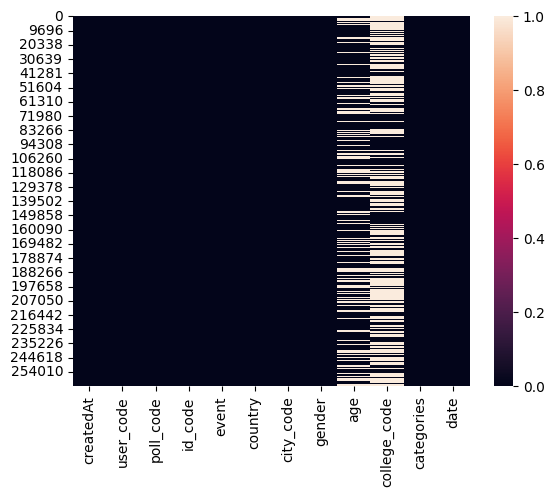

In [ ]:
sns.heatmap(nonsess_data.isna())

So we imputed the data for missing categories using the popular categories for the users who engaged with those polls (on those dates)

### Creating a Score Map for Ranking each interaction (event) in order of its importance


event_to_interactionStrength = {
    'Polls Answered': 1.0,  # Strong positive interaction
    'Shares': 1.0,          # Strong positive interaction
    'Expand': 0.6,          # Mild positive interaction
    'Impression': 0.2,      # Weak positive interaction
}



In [29]:
event_to_interactionStrength = {
    'Polls Answered': 1.0,  # Strong positive interaction
    'Shares': 1.0,          # Strong positive interaction
    'Expand': 0.6,          # Mild positive interaction
    'Impression': 0.2,      # Weak positive interaction
}

In [32]:
nonsess_data['strength'] = nonsess_data.event.apply(lambda x:event_to_interactionStrength.get(x,0) )


In [33]:
nonsess_data[['user_code','poll_code','strength']]

,user_code,poll_code,strength
0,user_2847,poll_27,0.2
1,user_2847,poll_220,0.2
2,user_2847,poll_190,0.2
3,user_2847,poll_153,0.2
4,user_2847,poll_42,0.2
...,...,...,...
263386,user_131,poll_706,1.0
263387,user_55,poll_707,1.0
263388,user_57,poll_707,1.0
263389,user_71,poll_707,1.0


In [34]:
interaction_matrix = nonsess_data.pivot_table(index='user_code', columns='poll_code', values='strength', aggfunc='sum', fill_value=0)
interaction_matrix

poll_code,poll_1,poll_10,poll_100,poll_101,poll_102,poll_103,poll_104,poll_105,poll_106,poll_107,...,poll_917,poll_918,poll_92,poll_93,poll_94,poll_95,poll_96,poll_97,poll_98,poll_99
user_code,,,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
user_100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
user_1000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_1001,1.2,0.2,0.2,0.0,1.2,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,1.2,0.0,1.2,0.0,0.0,1.2,0.0


In [35]:
mean = interaction_matrix.mean().mean()
std_dev = interaction_matrix.std().std()
interaction_matrix_normalized = (interaction_matrix - mean) / std_dev

In [36]:
interaction_matrix_normalized.head()

poll_code,poll_1,poll_10,poll_100,poll_101,poll_102,poll_103,poll_104,poll_105,poll_106,poll_107,...,poll_917,poll_918,poll_92,poll_93,poll_94,poll_95,poll_96,poll_97,poll_98,poll_99
user_code,,,,,,,,,,,,,,,,,,,,,
user_1,-0.32272,-0.322720,-0.322720,-0.32272,-0.32272,-0.32272,-0.322720,-0.32272,-0.322720,-0.32272,...,-0.32272,-0.32272,-0.322720,-0.32272,10.123990,-0.32272,-0.322720,-0.322720,-0.32272,-0.32272
user_10,-0.32272,-0.322720,-0.322720,-0.32272,-0.32272,-0.32272,-0.322720,-0.32272,-0.322720,-0.32272,...,-0.32272,-0.32272,-0.322720,-0.32272,8.382871,-0.32272,8.382871,-0.322720,-0.32272,-0.32272
user_100,-0.32272,-0.322720,-0.322720,-0.32272,-0.32272,-0.32272,-0.322720,-0.32272,8.382871,-0.32272,...,-0.32272,-0.32272,8.382871,-0.32272,8.382871,-0.32272,-0.322720,17.088463,-0.32272,-0.32272
user_1000,-0.32272,-0.322720,1.418398,-0.32272,-0.32272,-0.32272,-0.322720,-0.32272,-0.322720,-0.32272,...,-0.32272,-0.32272,-0.322720,-0.32272,-0.322720,-0.32272,-0.322720,-0.322720,-0.32272,-0.32272
user_1001,10.12399,1.418398,1.418398,-0.32272,10.12399,-0.32272,1.418398,-0.32272,-0.322720,-0.32272,...,-0.32272,-0.32272,-0.322720,-0.32272,-0.322720,10.12399,-0.322720,-0.322720,10.12399,-0.32272


### Algo 1: Alternating Least Squares

In [37]:
pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 49.3 MB/s eta 0:00:00


In [38]:
import scipy.sparse as sparse
from implicit.als import AlternatingLeastSquares

sparse_interaction_matrix = sparse.csr_matrix(interaction_matrix.values)

/usr/local/lib/python3.10/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [40]:

model = AlternatingLeastSquares(factors=50, regularization=0.01,iterations=20)

model.fit(sparse_interaction_matrix)

  0%|          | 0/20 [00:00<?, ?it/s]

In [98]:

user_code = random.sample(list(interaction_matrix_normalized.index),1)[0]
user_index = interaction_matrix.index.get_loc(user_code)
user_code,user_index


('user_2100', 1054)

In [99]:
### Checking the actual data available for this user, how many polls did they interact with and the type of interactions

nonsess_data[(nonsess_data.user_code==user_code)]#.groupby('event').event.count()

event
Impression        40
Polls Answered    34
Name: event, dtype: int64

In [100]:
# Get user recommendations
user_recommendations = model.recommend(user_index, sparse_interaction_matrix, N=50, filter_already_liked_items=False)
recommended_post_ids = [interaction_matrix.columns[i] for i in user_recommendations[0]]
print(recommended_post_ids)

['poll_577', 'poll_561', 'poll_618', 'poll_526', 'poll_194', 'poll_636', 'poll_341', 'poll_91', 'poll_23', 'poll_568', 'poll_123', 'poll_2', 'poll_706', 'poll_273', 'poll_366', 'poll_529', 'poll_6', 'poll_105', 'poll_614', 'poll_241', 'poll_83', 'poll_296', 'poll_19', 'poll_478', 'poll_435', 'poll_223', 'poll_37', 'poll_249', 'poll_576', 'poll_580', 'poll_397', 'poll_602', 'poll_247', 'poll_682', 'poll_693', 'poll_665', 'poll_403', 'poll_325', 'poll_367', 'poll_283', 'poll_549', 'poll_289', 'poll_316', 'poll_667', 'poll_622', 'poll_543', 'poll_352', 'poll_361', 'poll_151', 'poll_644']


#### Heuristic Evaluation


1. From the top 50 recommendations, the percentage distribution of top 3 categories, should be similar to the distribution of the categories of user interacted post (Proxy for Recall)

2. From the top 50 recommendations, what is the number of posts they have actually interacted with (preferably polls answered or shared type of interactions  (Proxy for Precision)

In [101]:
polls_df[polls_df.poll_code.isin(recommended_post_ids)].categories.value_counts(normalize=True).head(5)*100

Other                      42.0
Lifestyle                  18.0
Dating and Relationship    16.0
Internet                    6.0
Would You Rather            4.0
Name: categories, dtype: float64

In [102]:
interacted = list(nonsess_data[(nonsess_data.user_code==user_code) & (nonsess_data.event=='Polls Answered') ].poll_code.unique())
polls_df[polls_df.poll_code.isin(interacted)].categories.value_counts(normalize=True).head(5)*100

Other                      38.235294
Lifestyle                  26.470588
Dating and Relationship    11.764706
Would You Rather            5.882353
Hypothetical                5.882353
Name: categories, dtype: float64

### We can see that for both the sets, recommended polls & user interated polls, the top 3 categories are the same.

In [103]:
any_interactions_truth = list(nonsess_data[(nonsess_data.user_code==user_code)].poll_code.unique())
if len(any_interactions_truth):
  print(len(set(any_interactions_truth).intersection(set(recommended_post_ids[:len(any_interactions_truth)])))/len(any_interactions_truth))

0.9487179487179487


In [104]:
user_predPrecision_map = {}
for user_code in list(interaction_matrix_normalized.index):
  user_index = interaction_matrix.index.get_loc(user_code)
  user_recommendations = model.recommend(user_index, sparse_interaction_matrix, N=50, filter_already_liked_items=False)
  recommended_post_ids = [interaction_matrix.columns[i] for i in user_recommendations[0]]

  any_interactions_truth = list(nonsess_data[(nonsess_data.user_code==user_code)].poll_code.unique())

  if len(any_interactions_truth)>=10:
    user_predPrecision_map[user_code] = round(len(set(any_interactions_truth).intersection(set(recommended_post_ids[:len(any_interactions_truth)])))/len(any_interactions_truth),2)


In [107]:
pd.Series(user_predPrecision_map.values()).describe()

count    2473.000000
mean        0.729450
std         0.223478
min         0.080000
25%         0.600000
50%         0.790000
75%         0.910000
max         1.000000
dtype: float64

### Median Value of Precision is 79 which is not bad at all.

With some additional hyperparameter tuning this can be cranked up a bit

### Algo 2: Pure SVD

In [108]:
from scipy.sparse.linalg import svds

In [109]:
user_poll_matrix_array = interaction_matrix.to_numpy()

In [144]:
U, sigma, Vt = svds(user_poll_matrix_array, k=35)

In [145]:
sigma_diag_matrix = np.diag(sigma)

In [146]:
predicted_ratings = np.dot(np.dot(U, sigma_diag_matrix), Vt)

# Convert the result back to a pandas DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=interaction_matrix.columns)
predicted_ratings_df.head()

poll_code,poll_1,poll_10,poll_100,poll_101,poll_102,poll_103,poll_104,poll_105,poll_106,poll_107,...,poll_917,poll_918,poll_92,poll_93,poll_94,poll_95,poll_96,poll_97,poll_98,poll_99
0,-0.077622,0.082700,-0.046004,0.183694,-0.058883,0.047341,0.001192,0.183818,0.088328,0.081816,...,-0.006907,0.000846,0.003774,0.052982,0.543043,0.128000,0.043040,0.153342,-0.042211,0.024446
1,0.165120,0.297597,0.233539,0.387938,0.140281,0.361607,0.181241,0.313767,0.239342,0.468221,...,0.005659,-0.002494,0.143339,0.232683,0.163384,0.054166,0.320989,0.472563,0.155912,0.211858
2,0.157875,0.335320,0.018738,0.419164,0.250552,0.063446,0.289638,0.084531,0.196898,0.386893,...,0.009605,0.005424,0.115515,0.220126,0.108005,-0.038333,0.120809,0.419336,0.064244,0.197608
3,-0.007460,0.251403,0.021829,-0.005573,0.006712,-0.037910,-0.009368,-0.103688,0.005507,-0.032449,...,-0.001267,0.001226,0.001094,-0.011243,0.003955,0.030959,-0.032375,-0.023532,0.049664,0.027781
4,1.022434,0.361652,0.325544,0.028390,0.774176,-0.010834,0.947545,0.001231,-0.019317,0.006686,...,0.004846,0.008123,0.007253,0.017807,-0.001272,1.043646,0.052011,0.040772,0.637591,0.002929


In [126]:
def get_top_N_recommendations(user, N=50):
    user_ratings = predicted_ratings_df.loc[user]
    sorted_user_ratings = user_ratings.sort_values(ascending=False)
    top_N_recommendations = list(sorted_user_ratings.index[:N])
    return top_N_recommendations

In [147]:
user_code_index_map  = dict(zip(list(interaction_matrix_normalized.index),range(0,len(interaction_matrix_normalized.index))))
top_recommendations_for_users = {}
for user,idx in user_code_index_map.items():
    top_recommendations_for_users[user] = get_top_N_recommendations(idx, N=50)


In [150]:
user_predPrecision_map2 = {}
for user_code,recoLst in list(top_recommendations_for_users.items())[:]:

  any_interactions_truth = list(nonsess_data[(nonsess_data.user_code==user_code)].poll_code.unique())

  if len(any_interactions_truth)>=10:
    user_predPrecision_map2[user_code] = round(len(set(any_interactions_truth).intersection(set(recoLst[:len(any_interactions_truth)])))/len(any_interactions_truth),2)


In [151]:
### Trying again with k=15,20,30
pd.Series(user_predPrecision_map2.values()).describe()

count    2473.000000
mean        0.693368
std         0.229900
min         0.070000
25%         0.550000
50%         0.750000
75%         0.880000
max         1.000000
dtype: float64

Here the precision seemed to be on the lower side. After trying k=15,20,30,35, we could get a decent performance at k=35 which is median precision of 75%

### Algo 3: LightFM

In [153]:
# pip install lightfm
from lightfm import LightFM
from lightfm.data import Dataset

In [ ]:
nonsess_data[['user_code','poll_code','strength']]

In [179]:
nonsess_data[['user_code','poll_code','strength']].head()

,user_code,poll_code,strength
0,user_2847,poll_27,0.2
1,user_2847,poll_220,0.2
2,user_2847,poll_190,0.2
3,user_2847,poll_153,0.2
4,user_2847,poll_42,0.2


In [206]:
dataset = Dataset()
dataset.fit(users=nonsess_data['user_code'], items=nonsess_data['poll_code'])

In [207]:
(interactions, weights) = dataset.build_interactions((user, poll, strength) for user, poll, strength in zip(nonsess_data['user_code'], nonsess_data['poll_code'], nonsess_data['strength']))

In [257]:
model = LightFM(no_components=50,learning_rate=0.05,loss='warp')
model.fit(interactions, epochs=10, num_threads=4)

In [258]:
users = nonsess_data['user_code'].unique()
unique_polls = nonsess_data['poll_code'].unique()
top_recommendations_for_users = {}

for user in users:

  user_id = dataset.mapping()[0][user]
  scores = model.predict(user_id, np.arange(interactions.shape[1]))

  top_N_items = np.argsort(-scores)[:N]

  top_poll_recs = [unique_polls[item] for item in top_N_items]
  top_recommendations_for_users[user] = top_poll_recs



In [259]:
user_predPrecision_map3 = {}
for user_code,recoLst in list(top_recommendations_for_users.items())[:]:

  any_interactions_truth = list(nonsess_data[(nonsess_data.user_code==user_code)].poll_code.unique())

  if len(any_interactions_truth)>=10:
    user_predPrecision_map3[user_code] = round(len(set(any_interactions_truth).intersection(set(recoLst[:len(any_interactions_truth)])))/len(any_interactions_truth),2)


In [260]:
# no_components=50 #epochs 10
pd.Series(user_predPrecision_map3.values()).describe()


count    2473.000000
mean        0.730728
std         0.232294
min         0.080000
25%         0.610000
50%         0.800000
75%         0.910000
max         1.000000
dtype: float64

In [250]:
# no_components=150 #epochs 50

pd.Series(user_predPrecision_map3.values()).describe()


count    2473.000000
mean        0.861844
std         0.234520
min         0.080000
25%         0.810000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

Performance is much higher for LightFM with about Mean Precision being around 73% and median precision at 80%. It further improves by taking epochs=50, n_components =150 to a staggering 86%

#### Lets try Testing a little more rigidly by choosing the find only strong positive interactions within reco set of a user ('Polls Answered','Shares')

In [280]:
user_predPrecision_map3 = {}
for user_code,recoLst in list(top_recommendations_for_users.items())[:]:

  any_interactions_truth = list(nonsess_data[(nonsess_data.user_code==user_code)&(nonsess_data.event.isin(['Polls Answered','Shares']))].poll_code.unique())

  if len(any_interactions_truth)>=10:
    denominator = len(any_interactions_truth) if len(any_interactions_truth)<=50 else 50
    user_predPrecision_map3[user_code] = round(len(set(any_interactions_truth).intersection(set(recoLst[:len(any_interactions_truth)])))/denominator,2)

In [281]:
pd.Series(user_predPrecision_map3.values()).describe()


count    2473.000000
mean        0.803579
std         0.180207
min         0.100000
25%         0.710000
50%         0.850000
75%         0.940000
max         1.000000
dtype: float64

### Based on users having >=10 strong positive interaction polls, on an average, recommendations contain 80% of those very same polls.    

### Trying the classic ROC for evaluating

In [253]:
from lightfm.evaluation import auc_score


In [261]:
# no_components=50 #epochs 10

top_N_items = [top_recommendations_for_users[user] for user in users]
auc_score(model, interactions, user_features=None, item_features=None, num_threads=4).mean()

0.9889588

In [255]:
# no_components=150 #epochs 50

top_N_items = [top_recommendations_for_users[user] for user in users]
auc_score(model, interactions, user_features=None, item_features=None, num_threads=4).mean()

0.9999814

In [270]:
users_satisfying_criterion = 0
eligible_to_be_evaluated = 0
for user_code,recoLst in list(top_recommendations_for_users.items())[:]:

  any_interactions_truth = list(nonsess_data[(nonsess_data.user_code==user_code)&(nonsess_data.event.isin(['Polls Answered','Shares']))].poll_code.unique())

  if len(any_interactions_truth)>=5:
      eligible_to_be_evaluated +=1

      has_positive_ranking = any(item in any_interactions_truth for item in recoLst[:5])
      if has_positive_ranking:
          users_satisfying_criterion += 1


percentage_satisfying_criterion = (users_satisfying_criterion / eligible_to_be_evaluated) * 100

print(f"Percentage of users with at least one STRONGLY 'POSITIVELY' INTERACTED item ranked higher than non-interacted items in top 5: {percentage_satisfying_criterion}%")

Percentage of users with at least one STRONGLY 'POSITIVELY' INTERACTED item ranked higher than non-interacted items in top 5: 99.26497611172364%


In [277]:
user_code = 'user_712'
top_recommendations_for_users[user_code][:5]

['poll_228', 'poll_14', 'poll_95', 'poll_544', 'poll_141']

In [279]:
nonsess_data[(nonsess_data.user_code==user_code)&(nonsess_data.event.isin(['Polls Answered','Shares']))].poll_code.unique()

array(['poll_98', 'poll_688', 'poll_647', 'poll_54', 'poll_228'],
      dtype=object)

## What else could be done?



1.  Co-Occurence and Clustering Algorithms - using the categories, we can create a user vector that has co-occurrence values of users against different categories based on which poll they have interacted. Using the those vectors, we can group similar users// or simply cluster the users.

For each user, we can use the cluster or N similar users to create their top poll recommendation

2.   Can do some bit hybrid generation using content similarity---- polls can be grouped on the basis of categories (which i so painfully imputed) and users  can be grouped on the basis of their location,gender, college (NaNs need to be cleaned) and then user-poll similarity can be found out if both can be encoded using some kind of encoders to create embeddings. A simple siamese would then train the embeddings to resemble eachother.  [Data preparation for this will take some time as we would need to draw easy, medium and hard positives and negatives out of the interactions]

